## Decison Tree Algorithm

**Decision Trees:** For the decision tree, you should implement or steal a decision tree algorithm (and by "implement or steal" I mean "steal"). Be sure to use some form of pruning. You are not required to use information gain (for example, there is something called the GINI index that is sometimes used) to split attributes, but you should describe whatever it is that you do use

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Ensures to display the graph within the notebook
%matplotlib inline 

In [9]:
#importing and reading the data
df_data = pd.read_csv("titanic.csv")
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df_data = df_data[['Survived','Pclass','Sex','Age','Fare']]
df_data.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


# #Cleaning Dataset

In [18]:
#checking the missing values in the dataset
df_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [20]:
#Grouping sex and age
df_data.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [21]:
df_data['Age']=df_data.groupby("Sex")['Age'].transform(lambda x: x.fillna(x.mean()))

## Changing category column to numerical column

In [22]:
#Importing Label Encoder from Sklearn Library
from sklearn.preprocessing import LabelEncoder

In [25]:
labelenc = LabelEncoder()
df_data['Sex'] = labelenc.fit_transform(df_data.Sex)
df_data.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [26]:
#differentiating independent and dependent variables
X = df_data[['Pclass','Sex','Age','Fare']]
y= df_data['Survived']

In [27]:
#importing train_test_split to create validation set
from sklearn.model_selection import train_test_split

In [29]:
#importing the train and testing dataset altogether
#setting random_state=101 ensures you get same observation when run train and test data
#stratify= y ensures similar distibution of classes in both train and test data
#test_size=0.25 ensures it contains 75% of data in my training set.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 101, stratify = y, test_size=0.25)

## Training the model

In [30]:
#importing decision tree classifier and regressor
from sklearn.tree import DecisionTreeClassifier

In [31]:
dtc_model = DecisionTreeClassifier(random_state=25)
#Fitting the model
dtc_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=25)

## Checking accuracy of testing dataset

In [33]:
#importing accuracy score from sklearn library
from sklearn.metrics import accuracy_score

In [43]:
predict_testing =dtc_model.predict(X_test)
accuracy_score(y_test, predict_testing)

0.7399103139013453

## Checking accuracy of training dataset

In [46]:
predict_training = dtc_model.predict(X_train)
accuracy_score(y_train,predict_training)

0.9865269461077845

**We can clearly see that for training_dataset accuracy is quite high whereas for testing_dataset it is very low. Therefore, our model is overfitted and to avoid this we will use pruning method later.

## Visualizing our final Decision Tree

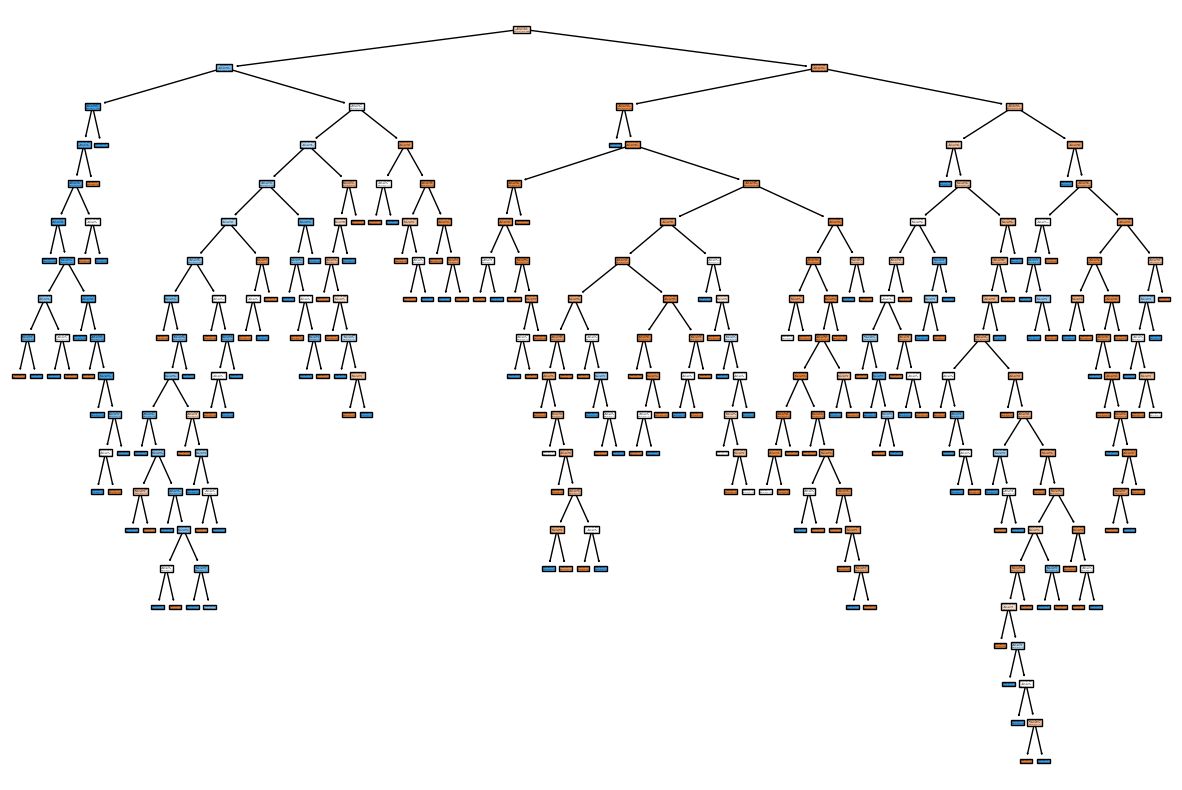

In [38]:
#Importing Tree Library from sklearn 
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtc_model, filled=True)
plt.show()

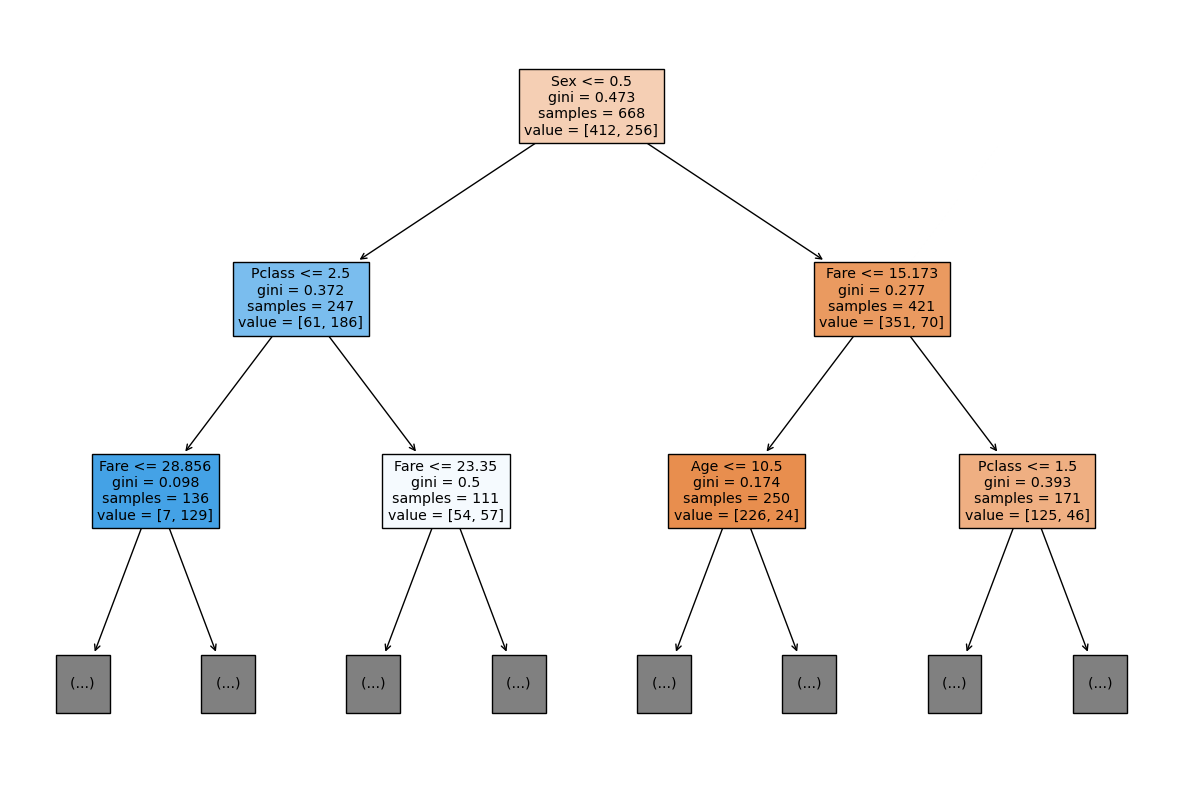

In [40]:
#Taking max_depth =2 and adding feature_names for more visibility of DT
plt.figure(figsize=(15,10))
tree.plot_tree(dtc_model, feature_names=X_train.columns.tolist(), max_depth =2, filled=True)
plt.show()

## Evaluating the testing dataset

In [41]:
#Importing classification_report and confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
print(classification_report(y_test,predict_testing))
print(confusion_matrix(y_test,predict_testing))

              precision    recall  f1-score   support

           0       0.77      0.82      0.80       137
           1       0.68      0.60      0.64        86

    accuracy                           0.74       223
   macro avg       0.73      0.71      0.72       223
weighted avg       0.74      0.74      0.74       223

[[113  24]
 [ 34  52]]


## Evaluating the training dataset

In [48]:
print(classification_report(y_train,predict_training))
print(confusion_matrix(y_train,predict_training))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       412
           1       0.99      0.97      0.98       256

    accuracy                           0.99       668
   macro avg       0.99      0.98      0.99       668
weighted avg       0.99      0.99      0.99       668

[[410   2]
 [  7 249]]


## Finding true and false positive rate

In [49]:
#Importing Libraries
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

In [50]:
dtc_prob = dtc_model.predict_proba(X_test)[:,1]

In [51]:
fpr_dtc, tpr_dtc, threshold_dtc = roc_curve(y_test,dtc_prob)

## Plotting ROC curve for our Decision Tree

In [52]:
auc_score_dtc = auc(fpr_dtc,tpr_dtc)
auc_score_dtc

0.7149889662196572

In [55]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(10,8))
    plt.plot(fpr_dtc, tpr_dtc, color='orange', label='AUC = %0.2f' % auc_score_dtc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

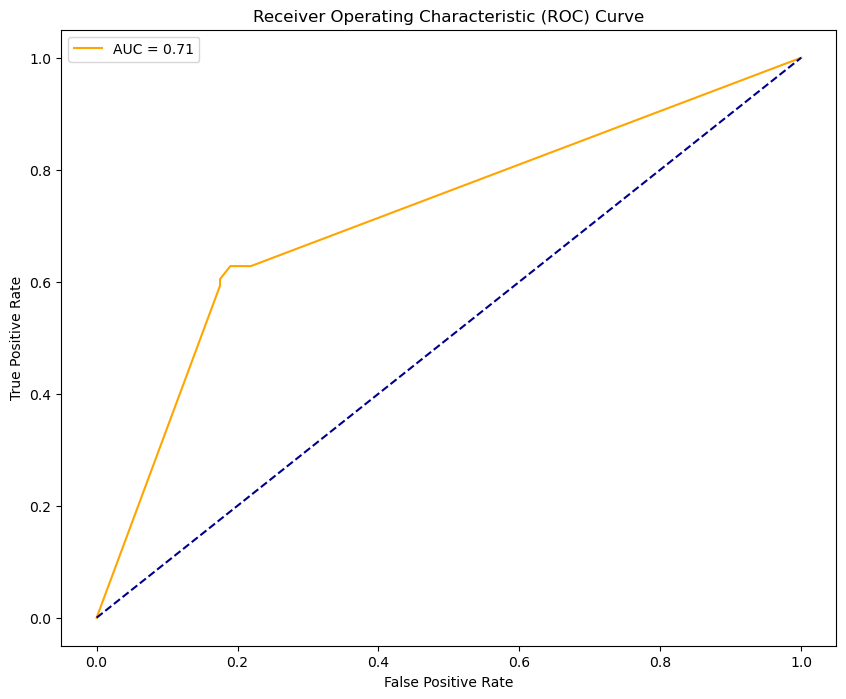

In [56]:
 plot_roc_curve(fpr_dtc,tpr_dtc)

## Pruning of our decision tree

In [57]:
prun = dtc_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = prun.ccp_alphas, prun.impurities

## Visualizing alpha w.r.t impurity of leaves

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

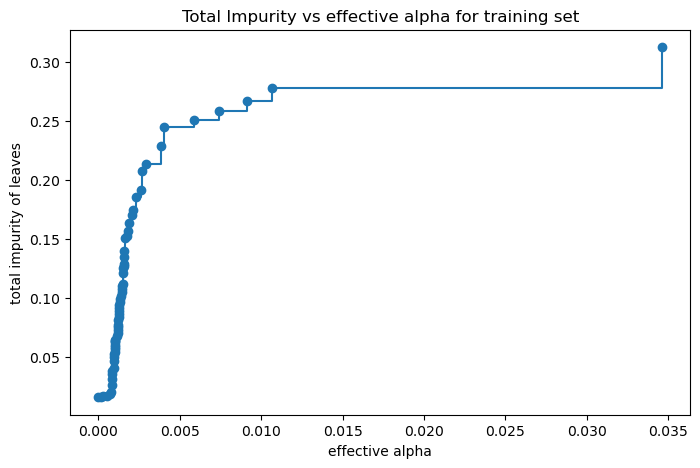

In [58]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [61]:
clf = []
for ccp_alpha in ccp_alphas:
    dtc_model = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    dtc_model.fit(X_train, y_train)
    clf.append(dtc_model)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clf[-1].tree_.node_count, ccp_alphas[-1]))


Number of nodes in the last tree is: 1 with ccp_alpha: 0.1604669094795096


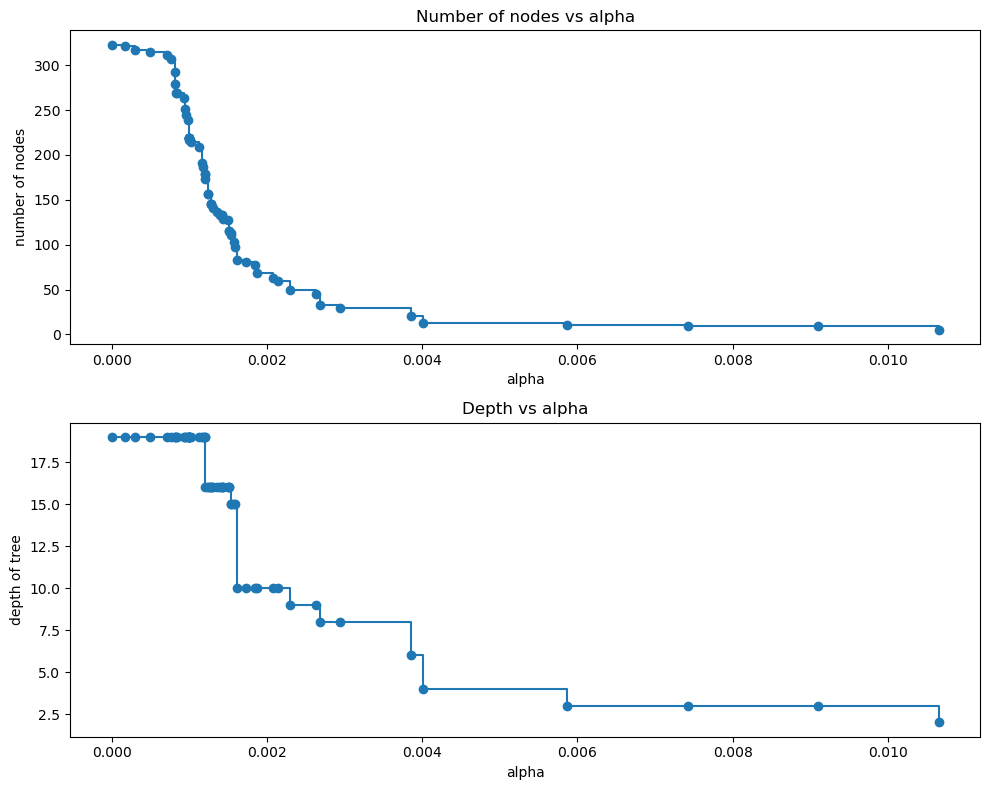

In [63]:
clf = clf[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [dtc_model.tree_.node_count for dtc_model in clf]
depth = [dtc_model.tree_.max_depth for dtc_model in clf]
fig, ax = plt.subplots(2, 1,figsize=(10,8))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

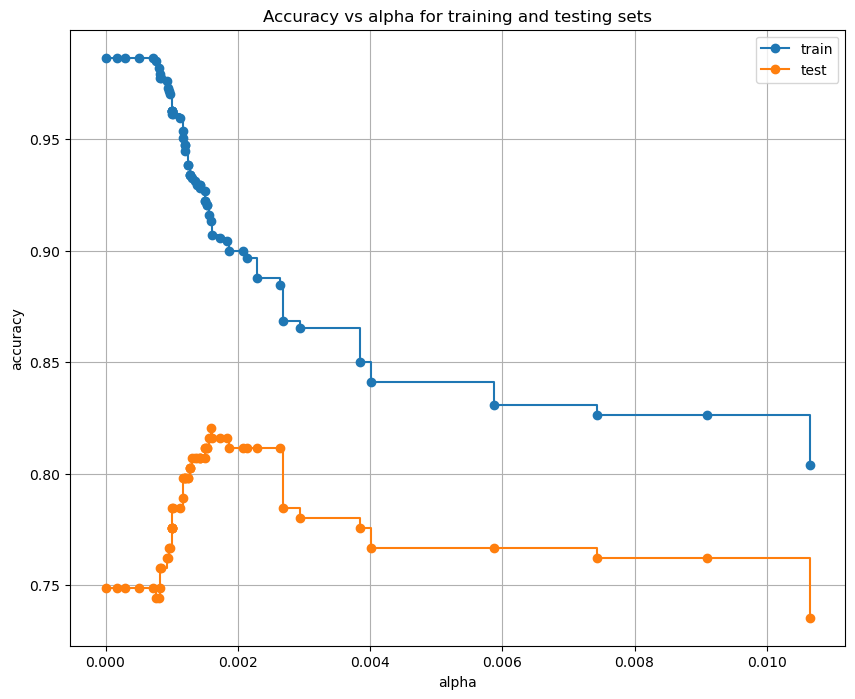

In [65]:
training_scores = [dtc_model.score(X_train, y_train) for dtc_model in clf]
testing_scores = [dtc_model.score(X_test, y_test) for dtc_model in clf]

fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, training_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, testing_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.grid()
plt.show()

## Accuracy after pruning

In [66]:
dtc_model = DecisionTreeClassifier(random_state=0, ccp_alpha=0.016)
dtc_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.016, random_state=0)

## Accuracy of testing and training dataset

In [69]:
#testing_accuracy
prun_test = dtc_model.predict(X_test)
accuracy_score(y_test, prun_test)

0.7354260089686099

In [70]:
#training_accuracy
prun_train = dtc_model.predict(X_train)
accuracy_score(y_train, prun_train)

0.8038922155688623

## Visualizing the final Decision Tree after Pruning

[Text(0.6, 0.8333333333333334, 'x[1] <= 0.5\ngini = 0.473\nsamples = 668\nvalue = [412, 256]'),
 Text(0.4, 0.5, 'x[0] <= 2.5\ngini = 0.372\nsamples = 247\nvalue = [61, 186]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.098\nsamples = 136\nvalue = [7, 129]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.5\nsamples = 111\nvalue = [54, 57]'),
 Text(0.8, 0.5, 'gini = 0.277\nsamples = 421\nvalue = [351, 70]')]

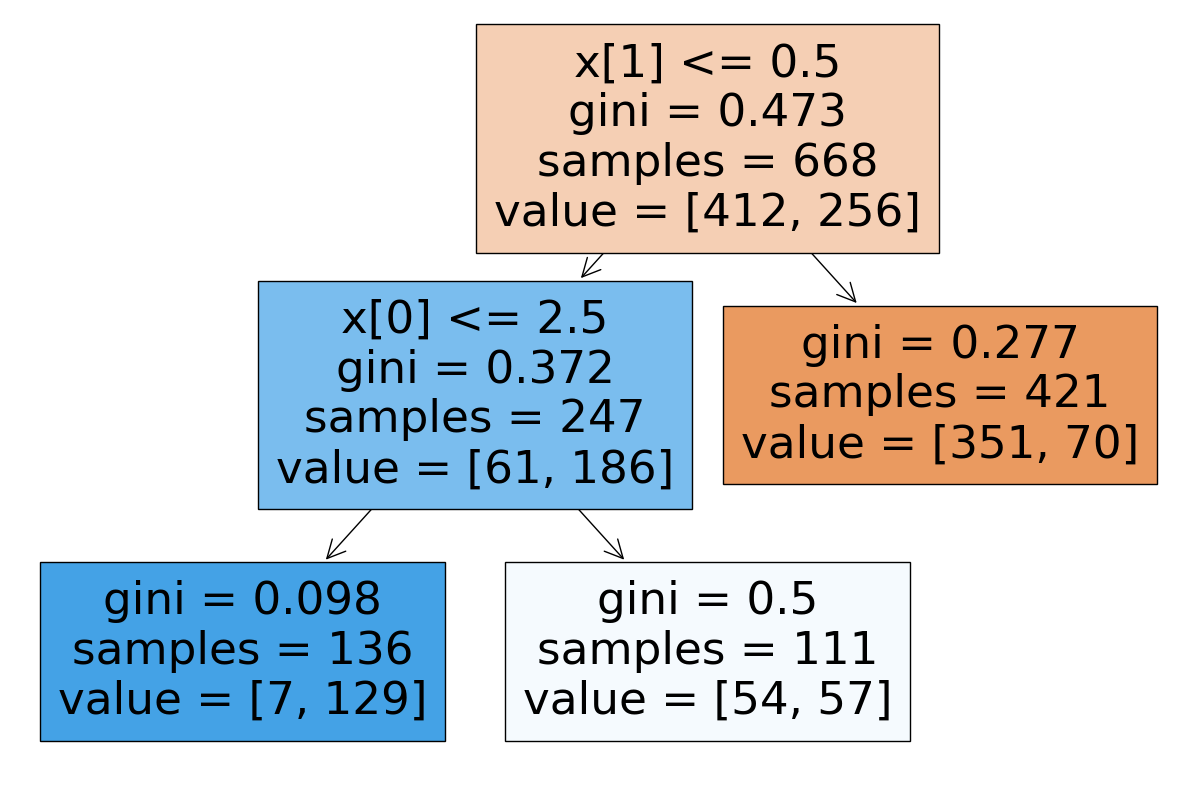

In [73]:
plt.figure(figsize=(15,10))
tree.plot_tree(dtc_model,filled=True)

## Neural Network

**Neural Networks:**
For the neural network you should implement or steal your favorite kind of
network and training algorithm. You may use networks of nodes with as many layers as you like
and any activation function you see fit.

In [ ]:
import tenserflow as tf
import keras as keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
kerasmodel = Sequential()
kerasmodel.add(Dense(12, input_dim=2, activation = 'relu'))

kerasmodel.add(Dense(12, activation = 'relu'))
kerasmodel.add(Dense(12, activation = 'relu'))
kerasmodel.add(Dense(8, activation = 'relu'))
kerasmodel.add(Dense(1, activation = 'sigmoid'))

In [ ]:
kerasmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
kerasmodel.fit(X_train, y_train, epochs=50, batch_size=2)

In [ ]:
#Train accuracy 
loss,accuracy = kerasmodel.evaluate(X_train, y_train)
print(accuracy)